In [50]:
import io
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
train = pd.read_csv(r"C:\Users\DELL\Downloads\Train.csv", sep=",")
test = pd.read_csv(r"C:\Users\DELL\Downloads\Test.csv", sep=",")
automobile = pd.concat([train, test])

automobile

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.00,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.00,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.00,Low,4.00,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.00,Low,1.00,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.00,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.00,High,5.00,Cat_4,C


In [52]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.options.display.float_format="{:,.2f}".format
automobile.sample(20)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
725,461363,Male,No,49,Yes,Artist,0.00,Low,1.00,Cat_6,A
2208,466502,Male,No,19,No,Healthcare,0.00,Low,5.00,Cat_3,A
3775,464669,Female,Yes,42,No,Engineer,0.00,Low,4.00,Cat_4,D
2153,467695,Male,Yes,43,No,Marketing,1.00,Low,2.00,Cat_7,D
2997,460701,Male,Yes,66,No,Entertainment,0.00,Average,2.00,Cat_6,B
2402,463063,Female,No,25,No,Marketing,NaN,Low,7.00,Cat_2,B
5039,463936,Male,Yes,32,No,Entertainment,1.00,Average,2.00,Cat_6,B
1093,465382,Female,No,39,Yes,Artist,0.00,Low,NaN,Cat_6,B
3305,466692,Female,NaN,27,No,Engineer,1.00,Low,1.00,Cat_5,A
7675,459672,Male,Yes,47,No,Artist,3.00,Average,3.00,Cat_6,C


In [53]:
#displaying dataset info
automobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [54]:
#checking no. of zeros in each column
(automobile==0).sum(axis=0)

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience    3087
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation          0
dtype: int64

In [55]:
#no. of duplicated rows
automobile.duplicated().sum()

38

In [56]:
automobile.describe()

,ID,Age,Work_Experience,Family_Size
count,"10,695.00","10,695.00","9,597.00","10,247.00"
mean,"463,468.09",43.51,2.62,2.84
std,"2,600.97",16.77,3.39,1.54
min,"458,982.00",18.00,0.00,1.00
25%,"461,220.50",30.00,0.00,2.00
50%,"463,451.00",41.00,1.00,3.00
75%,"465,733.50",53.00,4.00,4.00
max,"467,974.00",89.00,14.00,9.00


In [57]:
automobile.drop_duplicates(inplace=True)

In [58]:
automobile

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.00,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.00,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.00,Low,4.00,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.00,Low,1.00,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.00,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.00,High,5.00,Cat_4,C


In [59]:
automobile["Ever_Married"].fillna("No", inplace=True) #filling missing values with "no"
automobile["Graduated"].fillna("No", inplace=True) #filling missing values with "no"
automobile.dropna(subset=["Profession"], inplace=True) #removing rows having no values
automobile["Family_Size"].fillna(automobile["Family_Size"].mean(), inplace=True) #filling missing values with average family size
automobile.dropna(subset=["Var_1"], inplace=True) #removing rows with null values
automobile["Work_Experience"].replace(0, np.nan, inplace=True)
automobile["Work_Experience"].fillna(automobile["Work_Experience"].sum() / automobile["Age"].sum() * automobile["Age"], inplace=True) #calculating work experience on the basis of age

In [60]:
automobile

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.06,Average,3.00,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,3.64,High,2.00,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.17,High,6.00,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.00,Low,4.00,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.00,Low,1.00,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,2.88,Low,2.00,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.00,High,5.00,Cat_4,C


In [61]:
automobile.drop(["ID"], axis=1, inplace=True)

In [62]:
automobile

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.06,Average,3.00,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,3.64,High,2.00,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.17,High,6.00,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.00,Low,4.00,Cat_6,B
2623,Female,No,35,Yes,Doctor,1.00,Low,1.00,Cat_6,A
2624,Female,No,53,Yes,Entertainment,2.88,Low,2.00,Cat_6,C
2625,Male,Yes,47,Yes,Executive,1.00,High,5.00,Cat_4,C


In [63]:
automobile = pd.concat([automobile, pd.get_dummies(automobile["Gender"], prefix="Gender")], axis=1)
automobile = pd.concat([automobile, pd.get_dummies(automobile["Ever_Married"], prefix="Ever_Married")], axis=1)
automobile = pd.concat([automobile, pd.get_dummies(automobile["Graduated"], prefix="Graduated")], axis=1)
automobile = pd.concat([automobile, pd.get_dummies(automobile["Profession"], prefix="Profession")], axis=1)
automobile["Spending_Score_Level"] = automobile["Spending_Score"].apply(lambda x: ["Low", "Average", "High"].index(x))+1 #Label encoding

automobile["Segmentation_Level"] = automobile["Segmentation"].apply(lambda x: ["A", "B", "C", "D"].index(x))+1 #Label encoding

automobile = pd.concat([automobile, pd.get_dummies(automobile["Segmentation"], prefix="Segmentation")], axis=1)
Segmentation_encoding_dl = np.asarray(automobile[["Segmentation_A", "Segmentation_B", "Segmentation_C", "Segmentation_D"]])

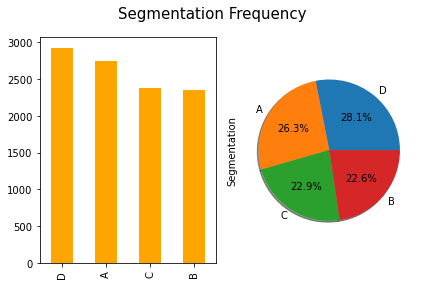

In [64]:
fig, ax = plt.subplots(1, 2)
automobile["Segmentation"].value_counts().plot.bar(color="orange", ax=ax[0])
automobile["Segmentation"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Segmentation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.tight_layout()

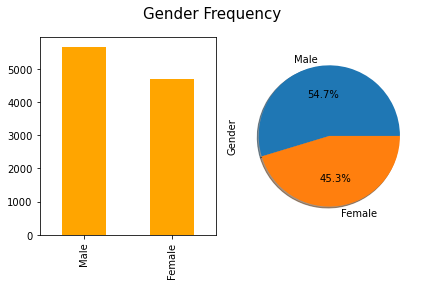

In [65]:
fig, ax = plt.subplots(1, 2)
automobile["Gender"].value_counts().plot.bar(color="orange", ax=ax[0])
automobile["Gender"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Gender Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.tight_layout()

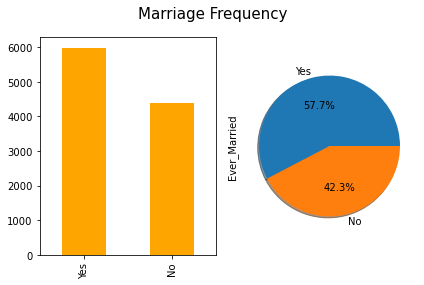

In [66]:
fig, ax = plt.subplots(1, 2)
automobile["Ever_Married"].value_counts().plot.bar(color="orange", ax=ax[0])
automobile["Ever_Married"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Marriage Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.tight_layout()

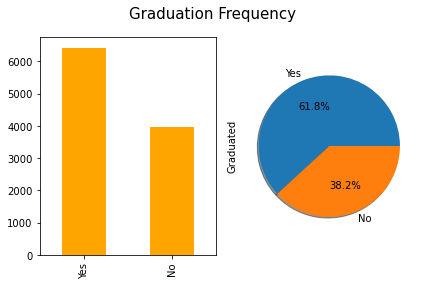

In [67]:
fig, ax = plt.subplots(1, 2)
automobile["Graduated"].value_counts().plot.bar(color="orange", ax=ax[0])
automobile["Graduated"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Graduation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

plt.tight_layout()

(array([], dtype=float64), [])

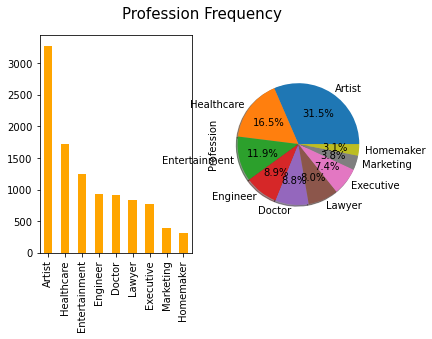

In [68]:
fig, ax = plt.subplots(1, 2)
automobile["Profession"].value_counts().plot.bar(color="orange", ax=ax[0])
automobile["Profession"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Profession Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

(array([], dtype=float64), [])

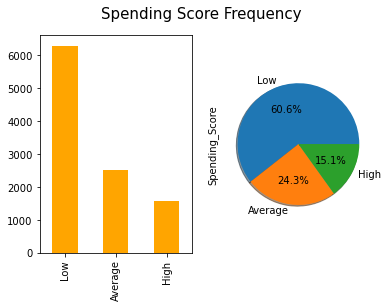

In [69]:
fig, ax = plt.subplots(1, 2)
automobile["Spending_Score"].value_counts().plot.bar(color="orange", ax=ax[0])
automobile["Spending_Score"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Spending Score Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)



C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Density'>

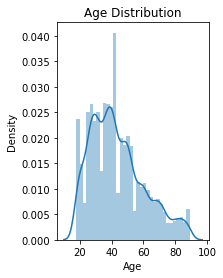

In [70]:
plt.subplot(1,2,1)
plt.title('Age Distribution')
sns.distplot(automobile.Age)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Family Size Distribution'}, xlabel='Family_Size', ylabel='Density'>

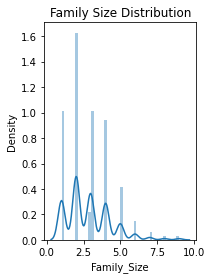

In [71]:
plt.subplot(1,2,1)
plt.title('Family Size Distribution')
sns.distplot(automobile.Family_Size)